# Import libraries

In [126]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd
import numpy as  np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from random import random
debug = False

# Lotka - Volterra predator/prey model 

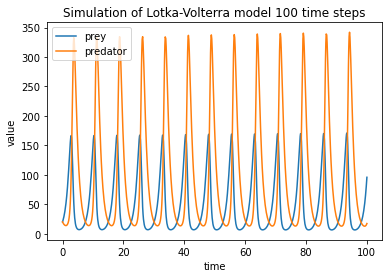

/Users/phamgiang/opt/anaconda3/envs/MasterDegree/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/Users/phamgiang/opt/anaconda3/envs/MasterDegree/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


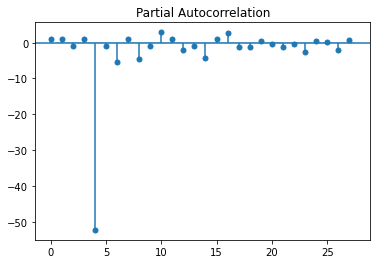

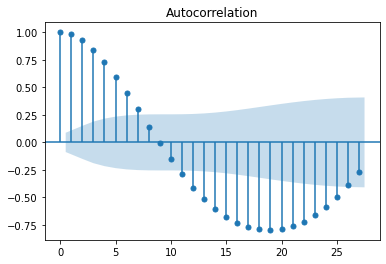

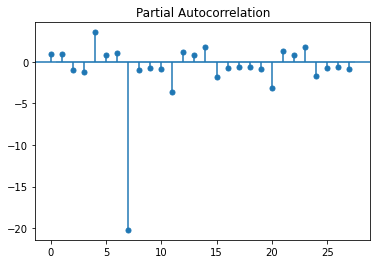

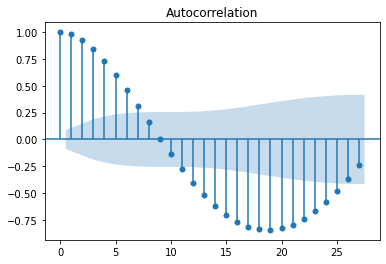

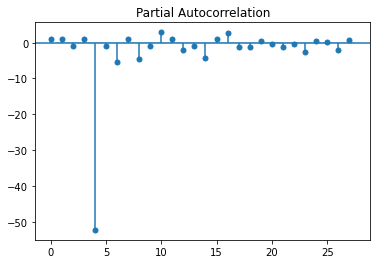

In [128]:
lvdf = pd.read_csv('/Users/phamgiang/Study/Master/SecondSemeter/CM/Project/lotka100.csv', sep =',', header=None)
t = lvdf.values[:,0]
y1 = lvdf.values[:, 1]
y2 = lvdf.values[:, 2]

splitPoint = 50

y1tr = y1[t<= splitPoint]
y1ts = y1[t > splitPoint]
y2tr = y2[t <=splitPoint]
y2ts = y2[t > splitPoint]

if debug:
    print(len(y1tr))
    print(len(y1ts))
    print(len(y2tr))
    print(len(y2ts))

plt.plot(t, y1, label = "prey") 
plt.plot(t, y2, label = "predator") 
plt.xlabel('time') 
plt.ylabel('value') 
plt.title('Simulation of Lotka-Volterra model 100 time steps') 
plt.legend() 
plt.show() 

plot_acf(y1)
plot_pacf(y1)

plot_acf(y2)
plot_pacf(y2)

### SARIMA 

### Predict for prey

#### One by one prediction

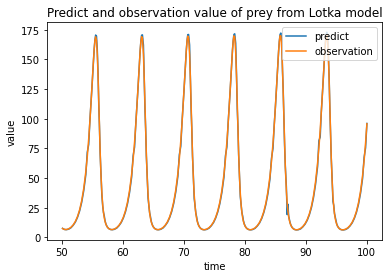

In [129]:
xaxis = t[t > splitPoint]
y1pre1 = []
y1trtem = y1tr
for i in range(len(y1ts)):
    model_y1 = SARIMAX(y1trtem, order=(2, 1, 0), seasonal_order=(0, 0, 0, 19))
    model_fit_y1 = model_y1.fit(disp=1)
    pre = model_fit_y1.predict(len(y1trtem), len(y1trtem))
    y1pre1.append(pre)
    obs = y1ts[i]
    y1trtem = np.append(y1trtem, obs)
    model_y1 = SARIMAX(y1trtem, order=(1, 1, 1), seasonal_order=(0, 0, 0, 19))
    model_fit_y1 = model_y1.fit(disp=1)

plt.plot(xaxis, y1pre1, label = "predict") 
plt.plot(xaxis, y1ts, label = "observation") 
plt.xlabel('time') 
plt.ylabel('value') 
plt.title('Predict and observation value of prey from Lotka model') 
plt.legend() 
plt.show()    

#### Traning 50 first time steps 

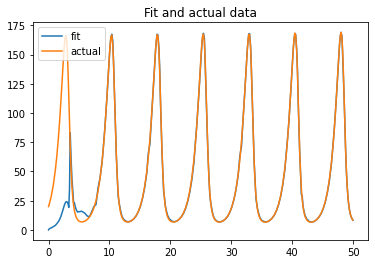

In [130]:
#model for splitPoint = 30
# model_y1 = SARIMAX(y1tr, order=(3, 0, 0), seasonal_order=(3, 2, 0, 19)) # quite good for 20 steps
# model_y1 = SARIMAX(y1tr, order=(6, 0, 0), seasonal_order=(3, 2, 0, 19)) # almost fit
# model_y1 = SARIMAX(y1tr, order=(9, 0, 0), seasonal_order=(3, 2, 0, 19)) # the best for predict 30 time steps
# model_y1 = SARIMAX(y1tr, order=(9, 0, 0), seasonal_order=(2, 2, 0, 19)) # work well when trained with 30 time steps
# model_y1 = SARIMAX(y1tr, order=(9, 0, 0), seasonal_order=(2, 1, 0, 19)) # fit for train with > 40 time steps
model_y1 = SARIMAX(y1tr, order=(9, 0, 0), seasonal_order=(2, 1, 0, 19)) # fit for train with > 40 time steps 
model_fit_y1 = model_y1.fit(disp=1)
y1fit = model_fit_y1.predict()
xaxis = t[t <= splitPoint]
plt.plot(xaxis, y1fit, label = "fit")
plt.plot(xaxis, y1tr, label = "actual")
plt.title('Fit and actual data') 
plt.legend()
plt.show()


#### Predict next 50 time steps 

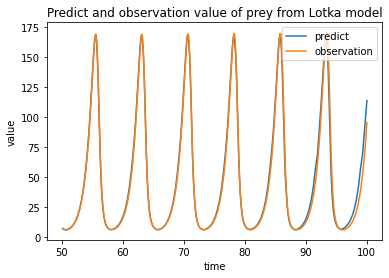

In [131]:
y1pred = model_fit_y1.predict(len(y1tr), len(y1tr) + len(y1ts)-1)
xaxis = t[t > splitPoint]
plt.plot(xaxis, y1pred, label = "predict") 
plt.plot(xaxis, y1ts, label = "observation") 
plt.xlabel('time') 
plt.ylabel('value') 
plt.title('Predict and observation value of prey from Lotka model') 
plt.legend() 
plt.show() 

### Predict for predator

#### Predict one by one  

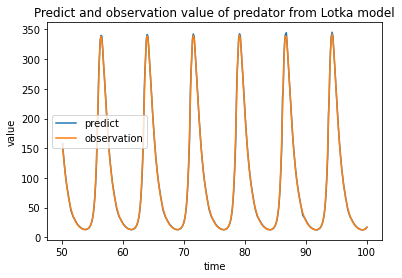

In [134]:
xaxis = t[t > splitPoint]
y2pre = []
y2trtem = y2tr
for i in range(len(y2ts)):
    model_y2 = SARIMAX(y2trtem, order=(2, 1, 0), seasonal_order=(0, 0, 0, 19))
    model_fit_y2 = model_y2.fit(disp=1)
    pre = model_fit_y2.predict(len(y2trtem), len(y2trtem))
    y2pre.append(pre)
    obs = y2ts[i]
    y2trtem = np.append(y2trtem, obs)
    model_y2 = SARIMAX(y2trtem, order=(1, 1, 1), seasonal_order=(0, 0, 0, 19))
    model_fit_y2 = model_y2.fit(disp=1)

plt.plot(xaxis, y2pre, label = "predict") 
plt.plot(xaxis, y2ts, label = "observation") 
plt.xlabel('time') 
plt.ylabel('value') 
plt.title('Predict and observation value of predator from Lotka model') 
plt.legend() 
plt.show()    

#### Traning first 50 time steps 

/Users/phamgiang/opt/anaconda3/envs/MasterDegree/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


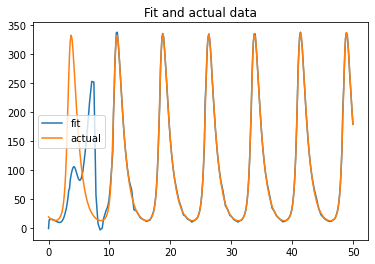

In [133]:
# model for splitPoint = 30
# model_y1 = SARIMAX(y1tr, order=(3, 0, 0), seasonal_order=(3, 2, 0, 19)) # quite good for 20 steps
# model_y1 = SARIMAX(y1tr, order=(6, 0, 0), seasonal_order=(3, 2, 0, 19)) # almost fit
# model_y1 = SARIMAX(y1tr, order=(9, 0, 0), seasonal_order=(3, 2, 0, 19)) # the best for predict 30 time steps
# model_y1 = SARIMAX(y1tr, order=(9, 0, 0), seasonal_order=(2, 2, 0, 19)) # still can predict well for 40 steps
# model_y2 = SARIMAX(y2tr, order=(9, 0, 0), seasonal_order=(3, 2, 1, 19)) # quite okie 
# model_y2 = SARIMAX(y2tr, order=(10, 0, 0), seasonal_order=(3, 1, 1, 19)) # quite okie
model_y2 = SARIMAX(y2tr, order=(10, 0, 0), seasonal_order=(3, 2, 1, 19)) # best until now 
# model_y2 = SARIMAX(y2tr, order=(10, 0, 0), seasonal_order=(4, 1, 1, 19)) # smooth but not as good as above 
model_fit_y2 = model_y2.fit(disp=1)
y2fit = model_fit_y2.predict()
xaxis = t[t <= splitPoint]
plt.plot(xaxis, y2fit, label = "fit")
plt.plot(xaxis, y2tr, label = "actual")
plt.title('Fit and actual data')
plt.legend()
plt.show()

#### Predict next 50 time steps  

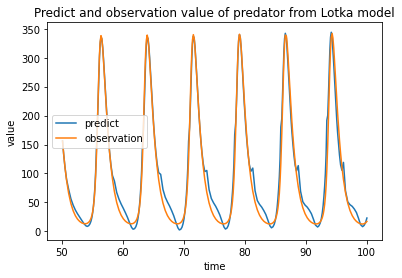

In [342]:
xaxis = t[t > splitPoint]
y2pred = model_fit_y2.predict(len(y2tr), len(y2tr) + len(y2ts)-1)

plt.plot(xaxis, y2pred, label = "predict") 
plt.plot(xaxis, y2ts, label = "observation") 
plt.xlabel('time') 
plt.ylabel('value') 
plt.title('Predict and observation value of predator from Lotka model') 
plt.legend() 
plt.show() 

## Lotka-Volterra prey/predator model with noise 

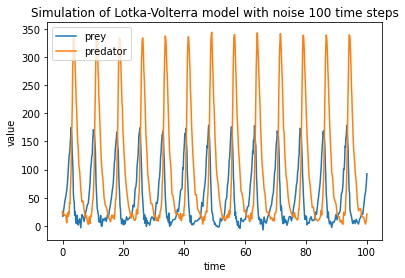

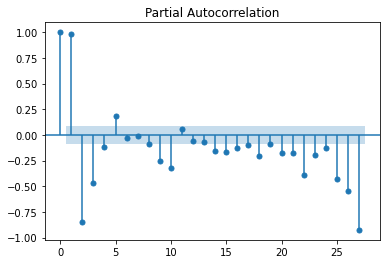

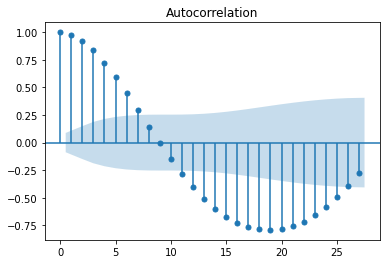

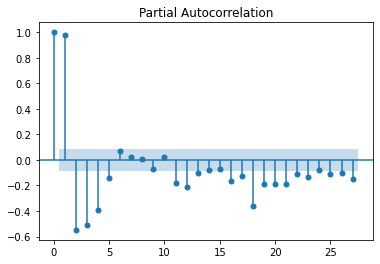

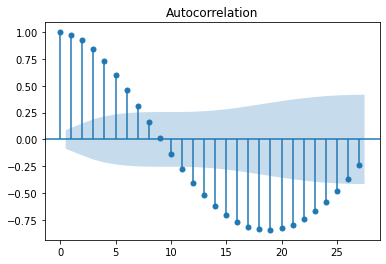

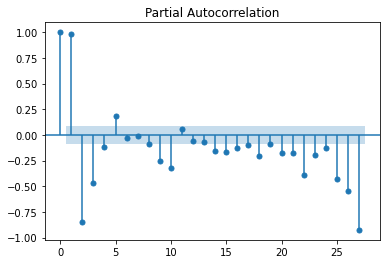

In [136]:
lvdf = pd.read_csv('/Users/phamgiang/Study/Master/SecondSemeter/CM/Project/lotka100.csv', sep =',', header=None)
t = lvdf.values[:,0]
y1n = lvdf.values[:, 1]
y2n = lvdf.values[:, 2]

noise = np.random.normal(0,5,len(y1n))
y1n = y1n + noise

noise = np.random.normal(0,5,len(y2n))
y2n = y2n + noise


splitPoint = 50

y1trn = y1n[t<= splitPoint]
y1tsn = y1n[t > splitPoint]
y2trn = y2n[t <=splitPoint]
y2tsn = y2n[t > splitPoint]

if debug:
    print(len(y1trn))
    print(len(y1tsn))
    print(len(y2trn))
    print(len(y2tsn))

plt.plot(t, y1n, label = "prey") 
plt.plot(t, y2n, label = "predator") 
plt.xlabel('time') 
plt.ylabel('value') 
plt.title('Simulation of Lotka-Volterra model with noise 100 time steps') 
plt.legend() 
plt.show() 

plot_acf(y1n)
plot_pacf(y1n)

plot_acf(y2n)
plot_pacf(y2n)

### Prey

#### Predict one by one

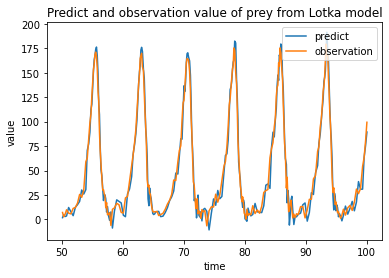

In [345]:
xaxis = t[t > splitPoint]
y1pren = []
y1trtem = y1trn
for i in range(len(y1tsn)):
    model_y1 = SARIMAX(y1trtem, order=(2, 1, 0), seasonal_order=(0, 0, 0, 19))
    model_fit_y1 = model_y1.fit(disp=1)
    pre = model_fit_y1.predict(len(y1trtem), len(y1trtem))
    y1pren.append(pre)
    obs = y1tsn[i]
    y1trtem = np.append(y1trtem, obs)
    model_y1 = SARIMAX(y1trtem, order=(1, 1, 1), seasonal_order=(0, 0, 0, 19))
    model_fit_y1 = model_y1.fit(disp=1)

plt.plot(xaxis, y1pren, label = "predict") 
plt.plot(xaxis, y1tsn, label = "observation") 
plt.xlabel('time') 
plt.ylabel('value') 
plt.title('Predict and observation value of prey from Lotka model') 
plt.legend() 
plt.show()    

#### Training first 50 time steps  

/Users/phamgiang/opt/anaconda3/envs/MasterDegree/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


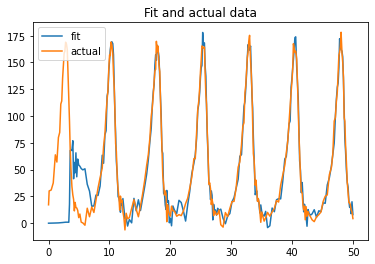

In [346]:
#model for splitPoint = 30
# model_y1 = SARIMAX(y1tr, order=(3, 0, 0), seasonal_order=(3, 2, 0, 19)) # quite good for 20 steps
# model_y1 = SARIMAX(y1tr, order=(6, 0, 0), seasonal_order=(3, 2, 0, 19)) # almost fit
# model_y1 = SARIMAX(y1tr, order=(9, 0, 0), seasonal_order=(3, 2, 0, 19)) # the best for predict 30 time steps
# model_y1 = SARIMAX(y1tr, order=(9, 0, 0), seasonal_order=(2, 2, 0, 19)) # work well when trained with 30 time steps
# model_y1 = SARIMAX(y1tr, order=(9, 0, 0), seasonal_order=(2, 1, 0, 19)) # fit for train with > 40 time steps
model_y1 = SARIMAX(y1trn, order=(9, 0, 0), seasonal_order=(2, 1, 0, 19)) # fit for train with > 40 time steps 
model_fit_y1 = model_y1.fit(disp=1)
y1fit = model_fit_y1.predict()
xaxis = t[t <= splitPoint]
plt.plot(xaxis, y1fit, label = "fit")
plt.plot(xaxis, y1trn, label = "actual")
plt.title('Fit and actual data') 
plt.legend()
plt.show()

#### Predict next 50 time steps  

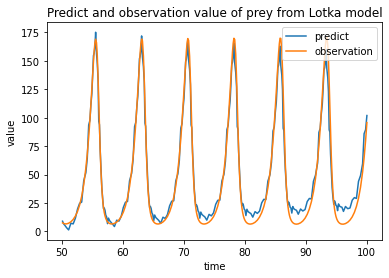

In [347]:
y1pred = model_fit_y1.predict(len(y1tr), len(y1tr) + len(y1ts)-1)
xaxis = t[t > splitPoint]
plt.plot(xaxis, y1pred, label = "predict") 
plt.plot(xaxis, y1ts, label = "observation") 
plt.xlabel('time') 
plt.ylabel('value') 
plt.title('Predict and observation value of prey from Lotka model') 
plt.legend() 
plt.show() 

### Predict for predator 

#### Predict one by one 

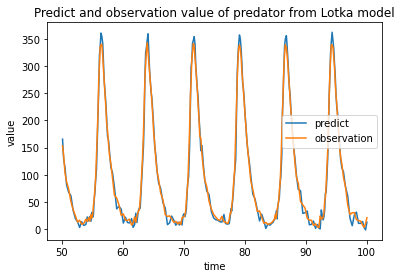

In [137]:
xaxis = t[t > splitPoint]
y2pre = []
y2trtem = y2trn
for i in range(len(y2tsn)):
    model_y2 = SARIMAX(y2trtem, order=(2, 1, 0), seasonal_order=(0, 0, 0, 19))
    model_fit_y2 = model_y2.fit(disp=1)
    pre = model_fit_y2.predict(len(y2trtem), len(y2trtem))
    y2pre.append(pre)
    obs = y2tsn[i]
    y2trtem = np.append(y2trtem, obs)
    model_y2 = SARIMAX(y2trtem, order=(1, 1, 1), seasonal_order=(0, 0, 0, 19))
    model_fit_y2 = model_y2.fit(disp=1)

plt.plot(xaxis, y2pre, label = "predict") 
plt.plot(xaxis, y2tsn, label = "observation") 
plt.xlabel('time') 
plt.ylabel('value') 
plt.title('Predict and observation value of predator from Lotka model') 
plt.legend() 
plt.show()    

#### Training first 50 time steps 

/Users/phamgiang/opt/anaconda3/envs/MasterDegree/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


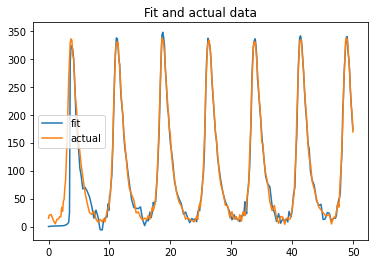

In [355]:
# model for splitPoint = 30
# model_y1 = SARIMAX(y1trn, order=(3, 0, 0), seasonal_order=(3, 2, 0, 19)) # quite good for 20 steps
# model_y1 = SARIMAX(y1trn, order=(6, 0, 0), seasonal_order=(3, 2, 0, 19)) # almost fit
# model_y1 = SARIMAX(y1trn, order=(9, 0, 0), seasonal_order=(3, 2, 0, 19)) # the best for predict 30 time steps
# model_y1 = SARIMAX(y1trn, order=(9, 0, 0), seasonal_order=(2, 2, 0, 19)) # still can predict well for 40 steps
# model_y2 = SARIMAX(y2trn, order=(9, 0, 0), seasonal_order=(3, 2, 1, 19)) # quite okie 
# model_y2 = SARIMAX(y2trn, order=(10, 0, 0), seasonal_order=(3, 1, 1, 19)) # quite okie
# model_y2 = SARIMAX(y2trn, order=(10, 0, 0), seasonal_order=(3, 2, 1, 19)) # best until now 
model_y2 = SARIMAX(y2trn, order=(10, 0, 0), seasonal_order=(3, 1, 1, 19)) # smooth but not as good as above 
model_fit_y2 = model_y2.fit(disp=1)
y2fit = model_fit_y2.predict()
xaxis = t[t <= splitPoint]
plt.plot(xaxis, y2fit, label = "fit")
plt.plot(xaxis, y2trn, label = "actual")
plt.title('Fit and actual data')
plt.legend()
plt.show()

#### Predict next 50 time steps 

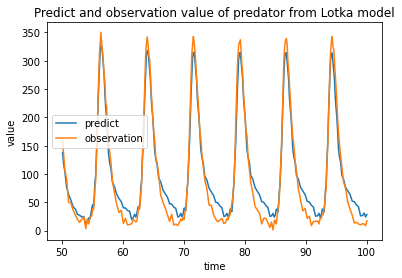

In [356]:
xaxis = t[t > splitPoint]
y2pred = model_fit_y2.predict(len(y2trn), len(y2trn) + len(y2tsn)-1)

plt.plot(xaxis, y2pred, label = "predict") 
plt.plot(xaxis, y2tsn, label = "observation") 
plt.xlabel('time') 
plt.ylabel('value') 
plt.title('Predict and observation value of predator from Lotka model') 
plt.legend() 
plt.show() 

# SIR model 

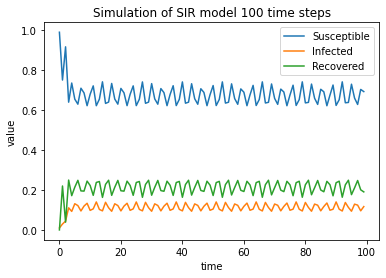

/Users/phamgiang/opt/anaconda3/envs/MasterDegree/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


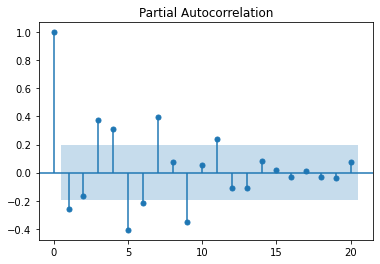

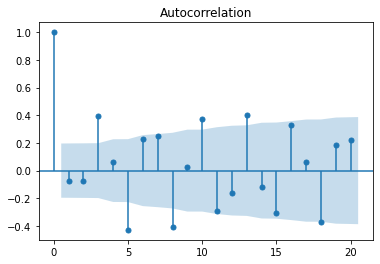

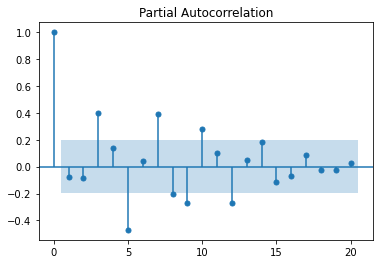

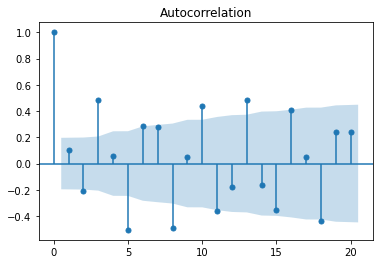

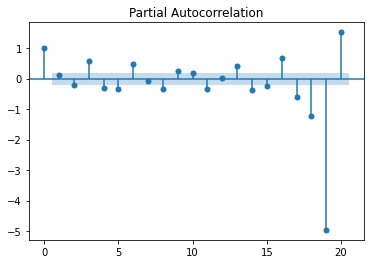

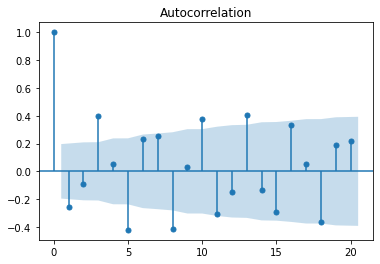

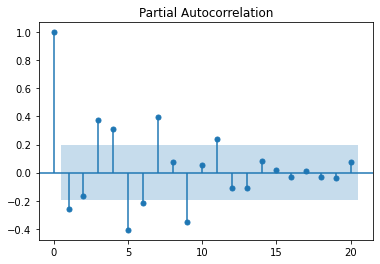

In [139]:
sirdf = pd.read_csv('/Users/phamgiang/Study/Master/SecondSemeter/CM/Project/sir100.csv', sep =',', header=None)
S = sirdf.values[:, 0]
I = sirdf.values[:, 1]
R = sirdf.values[:, 2]

t = np.array(list(range(len(S))))

if debug:
    print (len(S))
    print (len(I))
    print (len(R))
    print (len(t))
    print (t)

splitPoint = 50

Str = S[t <=splitPoint]
Sts = S[t > splitPoint]
Itr = I[t <=splitPoint]
Its = I[t > splitPoint]
Rtr = R[t <=splitPoint]
Rts = R[t > splitPoint]


plt.plot(t, S, label = "Susceptible") 
plt.plot(t, I, label = "Infected") 
plt.plot(t, R, label = "Recovered")
plt.xlabel('time') 
plt.ylabel('value') 
plt.title('Simulation of SIR model 100 time steps') 
plt.legend() 
plt.show() 

plot_acf(S)
plot_pacf(S)

plot_acf(I)
plot_pacf(I)

plot_acf(R)
plot_pacf(R)

### Predict for Susceptible

#### Train first 50 time steps

/Users/phamgiang/opt/anaconda3/envs/MasterDegree/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


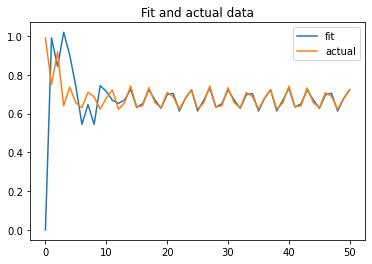

In [420]:
model_S = ARIMA(Str, order=(11,1,0))
model_fit_S = model_S.fit()
Sfit = model_fit_S.predict()
xaxis = t[t <= splitPoint]
plt.plot(xaxis, Sfit, label = "fit")
plt.plot(xaxis, Str, label = "actual")
plt.title('Fit and actual data') 
plt.legend()
plt.show()

#### Predict next 50 time steps  

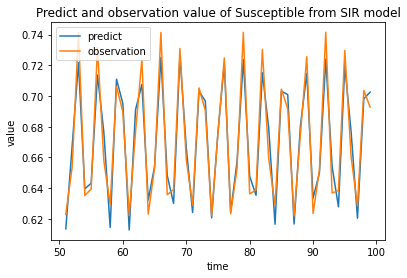

In [421]:
Spred = model_fit_S.predict(len(Str), len(Str) + len(Sts)-1)
xaxis = t[t > splitPoint]
plt.plot(xaxis, Spred, label = "predict") 
plt.plot(xaxis, Sts, label = "observation") 
plt.xlabel('time') 
plt.ylabel('value') 
plt.title('Predict and observation value of Susceptible from SIR model') 
plt.legend() 
plt.show() 

### Predict for Infected

#### Train first 50 time steps 

/Users/phamgiang/opt/anaconda3/envs/MasterDegree/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


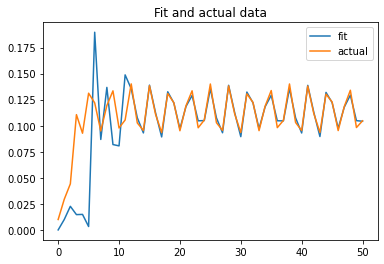

In [438]:
model_I = ARIMA(Itr, order=(8,1,0))
model_fit_I = model_I.fit()
Ifit = model_fit_I.predict()
xaxis = t[t <= splitPoint]
plt.plot(xaxis, Ifit, label = "fit")
plt.plot(xaxis, Itr, label = "actual")
plt.title('Fit and actual data') 
plt.legend()
plt.show()

#### Predict next 50 time steps 

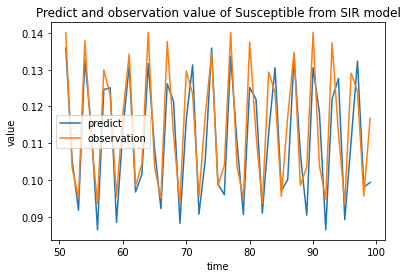

In [439]:
Ipred = model_fit_I.predict(len(Itr), len(Itr) + len(Its)-1)
xaxis = t[t > splitPoint]
plt.plot(xaxis, Ipred, label = "predict") 
plt.plot(xaxis, Its, label = "observation") 
plt.xlabel('time') 
plt.ylabel('value') 
plt.title('Predict and observation value of Susceptible from SIR model') 
plt.legend() 
plt.show() 

### Predict for Recovered

#### Train first 50 time steps 

/Users/phamgiang/opt/anaconda3/envs/MasterDegree/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


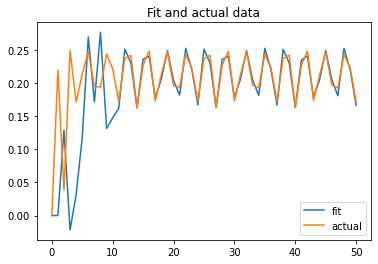

In [444]:
model_R = ARIMA(Rtr, order=(8,1,0))
model_fit_R = model_R.fit()
Rfit = model_fit_R.predict()
xaxis = t[t <= splitPoint]
plt.plot(xaxis, Rfit, label = "fit")
plt.plot(xaxis, Rtr, label = "actual")
plt.title('Fit and actual data') 
plt.legend()
plt.show()

#### Predict next 50 time steps 

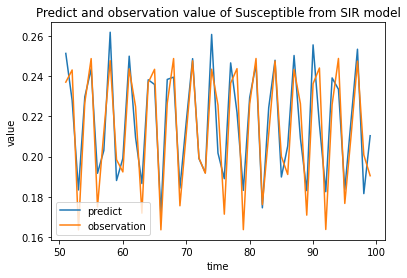

In [450]:
Rpred = model_fit_R.predict(len(Rtr), len(Rtr) + len(Rts)-1)
# Rpred = model_fit_R.predict(len(Rtr), len(Rtr) + 100 - 1)
xaxis = t[t > splitPoint]
# xaxisp = np.arange(50, 150)
plt.plot(xaxis, Rpred, label = "predict") 
plt.plot(xaxis, Rts, label = "observation") 
plt.xlabel('time') 
plt.ylabel('value') 
plt.title('Predict and observation value of Susceptible from SIR model') 
plt.legend() 
plt.show() 

## Predict with a few initial time steps (10 time steps)

In [140]:
splitPoint = 10

Str = S[t <=splitPoint]
Sts = S[t > splitPoint]
Itr = I[t <=splitPoint]
Its = I[t > splitPoint]
Rtr = R[t <=splitPoint]
Rts = R[t > splitPoint]

### Predict for Susceptible 

#### Train the first 10 time steps 

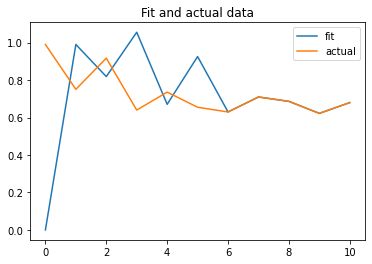

In [479]:
model_S = ARIMA(Str, order=(5,1,0))
model_fit_S = model_S.fit()
Sfit = model_fit_S.predict()
xaxis = t[t <= splitPoint]
plt.plot(xaxis, Sfit, label = "fit")
plt.plot(xaxis, Str, label = "actual")
plt.title('Fit and actual data') 
plt.legend()
plt.show()

#### Predict next 90 time steps 

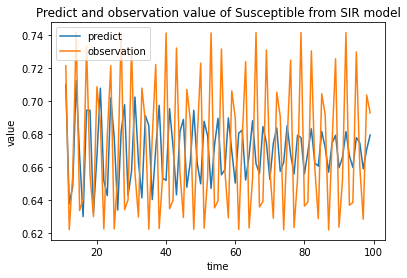

In [480]:
Spred = model_fit_S.predict(len(Str), len(Str) + len(Sts)-1)
xaxis = t[t > splitPoint]
plt.plot(xaxis, Spred, label = "predict") 
plt.plot(xaxis, Sts, label = "observation") 
plt.xlabel('time') 
plt.ylabel('value') 
plt.title('Predict and observation value of Susceptible from SIR model') 
plt.legend() 
plt.show() 

### Predict for Infected

#### Train first 10 time steps 

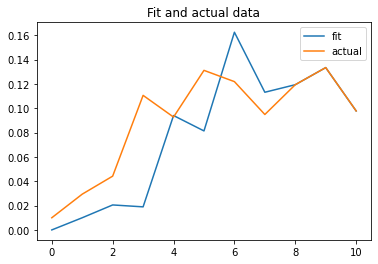

In [493]:
model_I = ARIMA(Itr, order=(7,1,0))
model_fit_I = model_I.fit()
Ifit = model_fit_I.predict()
xaxis = t[t <= splitPoint]
plt.plot(xaxis, Ifit, label = "fit")
plt.plot(xaxis, Itr, label = "actual")
plt.title('Fit and actual data') 
plt.legend()
plt.show()

#### Predict next 90 time steps

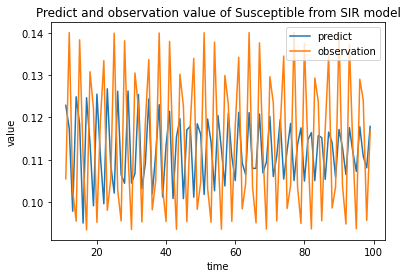

In [494]:
Ipred = model_fit_I.predict(len(Itr), len(Itr) + len(Its)-1)
xaxis = t[t > splitPoint]
plt.plot(xaxis, Ipred, label = "predict") 
plt.plot(xaxis, Its, label = "observation") 
plt.xlabel('time') 
plt.ylabel('value') 
plt.title('Predict and observation value of Susceptible from SIR model') 
plt.legend() 
plt.show() 

### Predict for Recovered

#### Train with 10 time steps 

/Users/phamgiang/opt/anaconda3/envs/MasterDegree/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


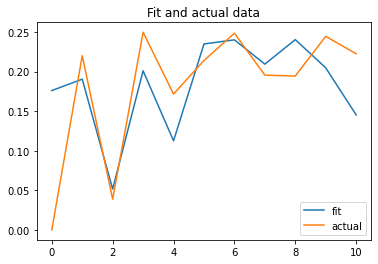

In [164]:
model_R = ARIMA(Rtr, order=(5,0,0))
model_fit_R = model_R.fit()
Rfit = model_fit_R.predict()
xaxis = t[t <= splitPoint]
plt.plot(xaxis, Rfit, label = "fit")
plt.plot(xaxis, Rtr, label = "actual")
plt.title('Fit and actual data') 
plt.legend()
plt.show()

#### Predict next 90 time steps 

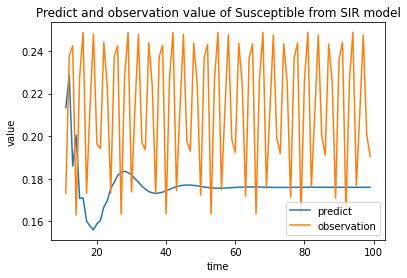

In [165]:
Rpred = model_fit_R.predict(len(Rtr), len(Rtr) + len(Rts)-1)
# Rpred = model_fit_R.predict(len(Rtr), len(Rtr) + 100 - 1)
xaxis = t[t > splitPoint]
# xaxisp = np.arange(50, 150)
plt.plot(xaxis, Rpred, label = "predict") 
plt.plot(xaxis, Rts, label = "observation") 
plt.xlabel('time') 
plt.ylabel('value') 
plt.title('Predict and observation value of Susceptible from SIR model') 
plt.legend() 
plt.show() 

# Logistic equation

No handles with labels found to put in legend.


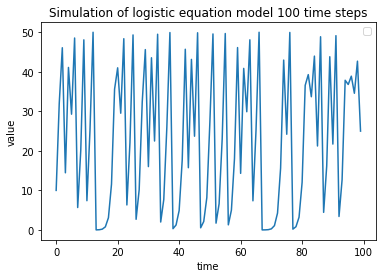

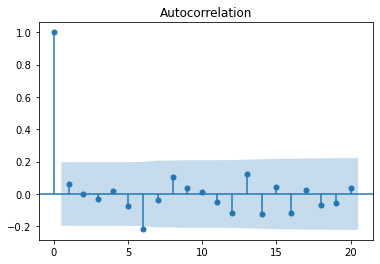

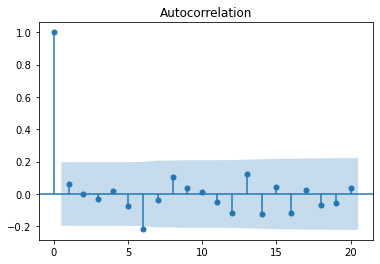

In [12]:
lvdf = pd.read_csv('/Users/phamgiang/Study/Master/SecondSemeter/CM/logistic_equa100.csv', sep =',', header=None)
N = lvdf.values[:,0]

t = np.array(list(range(len(N))))

splitPoint = 50

Ntr = N[t<= splitPoint]
Nts = N[t > splitPoint]

if debug:
    print(len(Ntr))
    print(len(Nts))

plt.plot(t, N) 
plt.xlabel('time') 
plt.ylabel('value') 
plt.title('Simulation of logistic equation model 100 time steps') 
plt.show() 

plot_acf(N)

## Predict

### Train first 50 time steps 

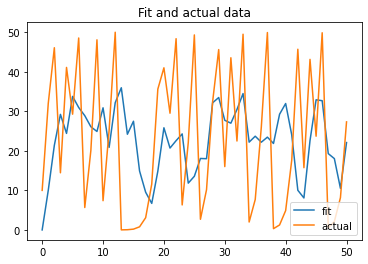

In [124]:
model_N = ARIMA(Ntr, order=(11,1,0))
model_fit_N = model_N.fit()
Nfit = model_fit_N.predict()
xaxis = t[t <= splitPoint]
plt.plot(xaxis, Nfit, label = "fit")
plt.plot(xaxis, Ntr, label = "actual")
plt.title('Fit and actual data') 
plt.legend()
plt.show()

### Predict the next 50 time steps 

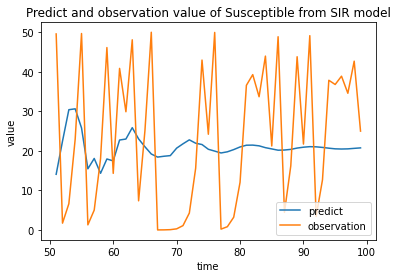

In [125]:
Npred = model_fit_N.predict(len(Ntr), len(Ntr) + len(Nts)-1)
# Rpred = model_fit_R.predict(len(Rtr), len(Rtr) + 100 - 1)
xaxis = t[t > splitPoint]
# xaxisp = np.arange(50, 150)
plt.plot(xaxis, Npred, label = "predict") 
plt.plot(xaxis, Nts, label = "observation") 
plt.xlabel('time') 
plt.ylabel('value') 
plt.title('Predict and observation value of Susceptible from SIR model') 
plt.legend() 
plt.show() 